<img src='stats/img/topbar.png' />

## Supervised Learning - Classificação

__CONTEÚDO:__<br>
* [4. K-Nearest Neighbor](#0.)
* [4.1 Aplicação 1: Iris Dataset](#1.)
* [4.2 Aplicação 2: Wine Quality](#2.)

<a id="0."></a><br>
### 4. K-Nearest Neighbor (KNN)

- Classificação baseado na similaridade evidenciada pela distância a K amostras vizinhas.
- Aplicável tanto em problemas de classificação como também de regressão. 
- O treinamento é rápido, pois se trata apenas de armazenar as amostras.
- Pode ser aplicado a problemas com diversas classes.
- Propenso a problemas de escala, de dados esparsos e de atributos irrelevantes.
- Outras dificuldades: um número muito grande de atributos e uma base de dados muito grande.

<img src='stats/img/knn.png' />

<a id="1."></a><br>
### 4.1 Aplicação 1: iris Dataset

#### 1. Preparação do problema
* a) Esclarecer o problema
* b) Carregar libraries
* c) Carregar dataset

__Abstract:__ Base dados bastante utilizada no estudo de Machine Learning e que vem embutida no scikit-learn. Apresenta características físicas de três tipos de flores, as quais devem ser usadas para construir um modelo que 'adivinhe' qual a flor.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [3]:
iris = datasets.load_iris()

#### 2. Sumarizar Dados
* a) Estatística descritiva
* b) Visualização de dados e estrutura
* c) EDA

In [4]:
X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(iris.target, columns=['species'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


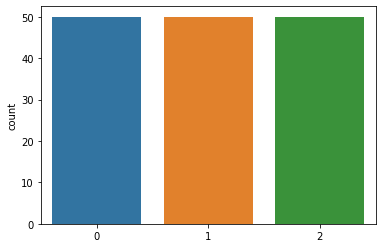

In [6]:
sns.countplot(np.ravel(y))

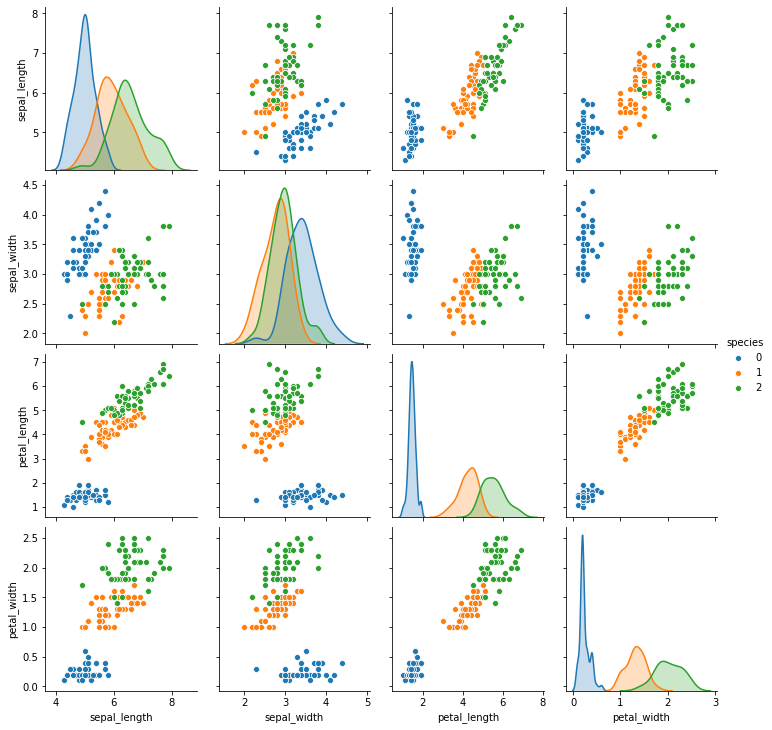

In [7]:
sns.pairplot(pd.concat([X, y], axis=1), hue='species')

#### 3. Preparar Dados
* a) Limpeza de dados
* b) Seleção de características
* c) Transformação dos dados

In [48]:
# Os dados já vem limpos do sklearn
# Serão usadas todas as características

#### 4. Avaliar algoritmos
* a) Dividir conjunto de dados em partes de treino e teste
* b) Treinar algoritmos com o conjunto de treino
* c) Avaliar desempenho no conjunto de teste

In [8]:
#Como esse projeto é voltado ao estudo do KNN, não será testado outro algoritmo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [9]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [10]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 11  2]
 [ 0  0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.85      0.92        13
           2       0.90      1.00      0.95        19

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.95        45



In [11]:
#Verificar desempenho de diversas partições do dataset
kfold = KFold(n_splits=5)
results = cross_val_score(knn, X, np.ravel(y), cv=kfold)
print(f'Desempenho por partição: {results} \nMédia de Desempenho: {results.mean()}')

Desempenho por partição: [1.         1.         0.83333333 0.93333333 0.76666667] 
Média de Desempenho: 0.9066666666666666


#### 5. Melhorar Desempenho
__Opção 1:__
   * a) Ajustes e seleção de parâmetros do modelo
   * b) Realizar 'Ensembles' (opcional)
   * c) Realizar Predições no conjunto de validação
   * d) Executar 5. até atingir o desempenho adequado

__Opção 2:__
   * Encontrar com figuração ótima com Cross Validation
   * Verificar desempenho de agrupamentos do dataset com KFold

In [12]:
# São avaliados os parâmetros n_neighbors e p por Cross-Validation e ajustando a escala dos parâmetros
standardizer = StandardScaler()
X_std = standardizer.fit_transform(X)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size = 0.3)

In [13]:
# Treinamento de modelo com nova escala
knn = KNeighborsClassifier()

In [14]:
# Criação de Pipeline
pipeline = Pipeline([("standardizer", standardizer), ("knn", knn)])

In [15]:
# Criação de espaço de parâmetros candidatos
param_space = [{"knn__n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10]}]

In [16]:
# Criação e Execução do pipeline, com CV do modelo
knn_cv = GridSearchCV(pipeline, param_space, cv=5, verbose=0).fit(X_train_std, np.ravel(y_train_std))

In [17]:
# Parâmetros que apresentaram melhor resultado no CV
knn_cv.best_estimator_.get_params()

{'memory': None,
 'steps': [('standardizer',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                        weights='uniform'))],
 'verbose': False,
 'standardizer': StandardScaler(copy=True, with_mean=True, with_std=True),
 'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                      weights='uniform'),
 'standardizer__copy': True,
 'standardizer__with_mean': True,
 'standardizer__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 8,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [18]:
y_pred_ = knn_cv.predict(X_test_std)
print(confusion_matrix(y_test_std, y_pred_))

[[11  0  0]
 [ 0 12  0]
 [ 0  2 20]]


In [19]:
print(classification_report(y_test_std, y_pred_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      1.00      0.92        12
           2       1.00      0.91      0.95        22

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45



In [20]:
# Verificar desempenho nos diferentes em conjuntos do dataset
kfold = KFold(n_splits=5)
results = cross_val_score(knn_cv, X_std, np.ravel(y), cv=kfold)
print(f'Desempenho por partição: {results} \nMédia de Desempenho: {results.mean()}')

Desempenho por partição: [1.         1.         0.83333333 0.93333333 0.8       ] 
Média de Desempenho: 0.9133333333333333


#### 6. Finalizar Modelo
* a) Selecionar parâmetros ajustados do modelo
* b) Criar modelo standalone com o conjunto completo de treino
* c) Armazenar modelo para uso futuro

In [ ]:
from pickle import dump, load

# Salvar modelo 
filename = 'knn_gridcv_model.sav'
dump(knn_cv, open(filename, 'wb'))

# Carregar modelo
# loaded_model = load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

***
***

<a id="2."></a><br>
### 4.2 Aplicação 2: Wine Quality (Falta melhorar desempenho)

#### 1. Preparação do problema
* a) Esclarecer o problema
* b) Carregar libraries
* c) Carregar dataset

__Abstract__: São incluídos dois datasets associados com as amostras de vinho tinto e branco 'Vinho Verde', do norte de Portugal. O modelo deve estimar a qualidade do vinho a partir dos dados físico-químicos informados.<br>
__Características dos dados:__ As classes de qualidade são ordenadas e não-balanceadas (Há muito mais vinhos de qualidade média do que excelentes e ruins.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
red = pd.read_csv('data/winequality-red.csv', sep=";")
white = pd.read_csv('data/winequality-white.csv', sep=";")

#### 2. Sumarizar Dados
* a) Estatística descritiva
* b) Visualização de dados e estrutura
* c) EDA

In [3]:
#red['type'] = [0 for i in range(red.shape[0])]
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#white['type'] = ['white' for i in range(white.shape[0])]
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


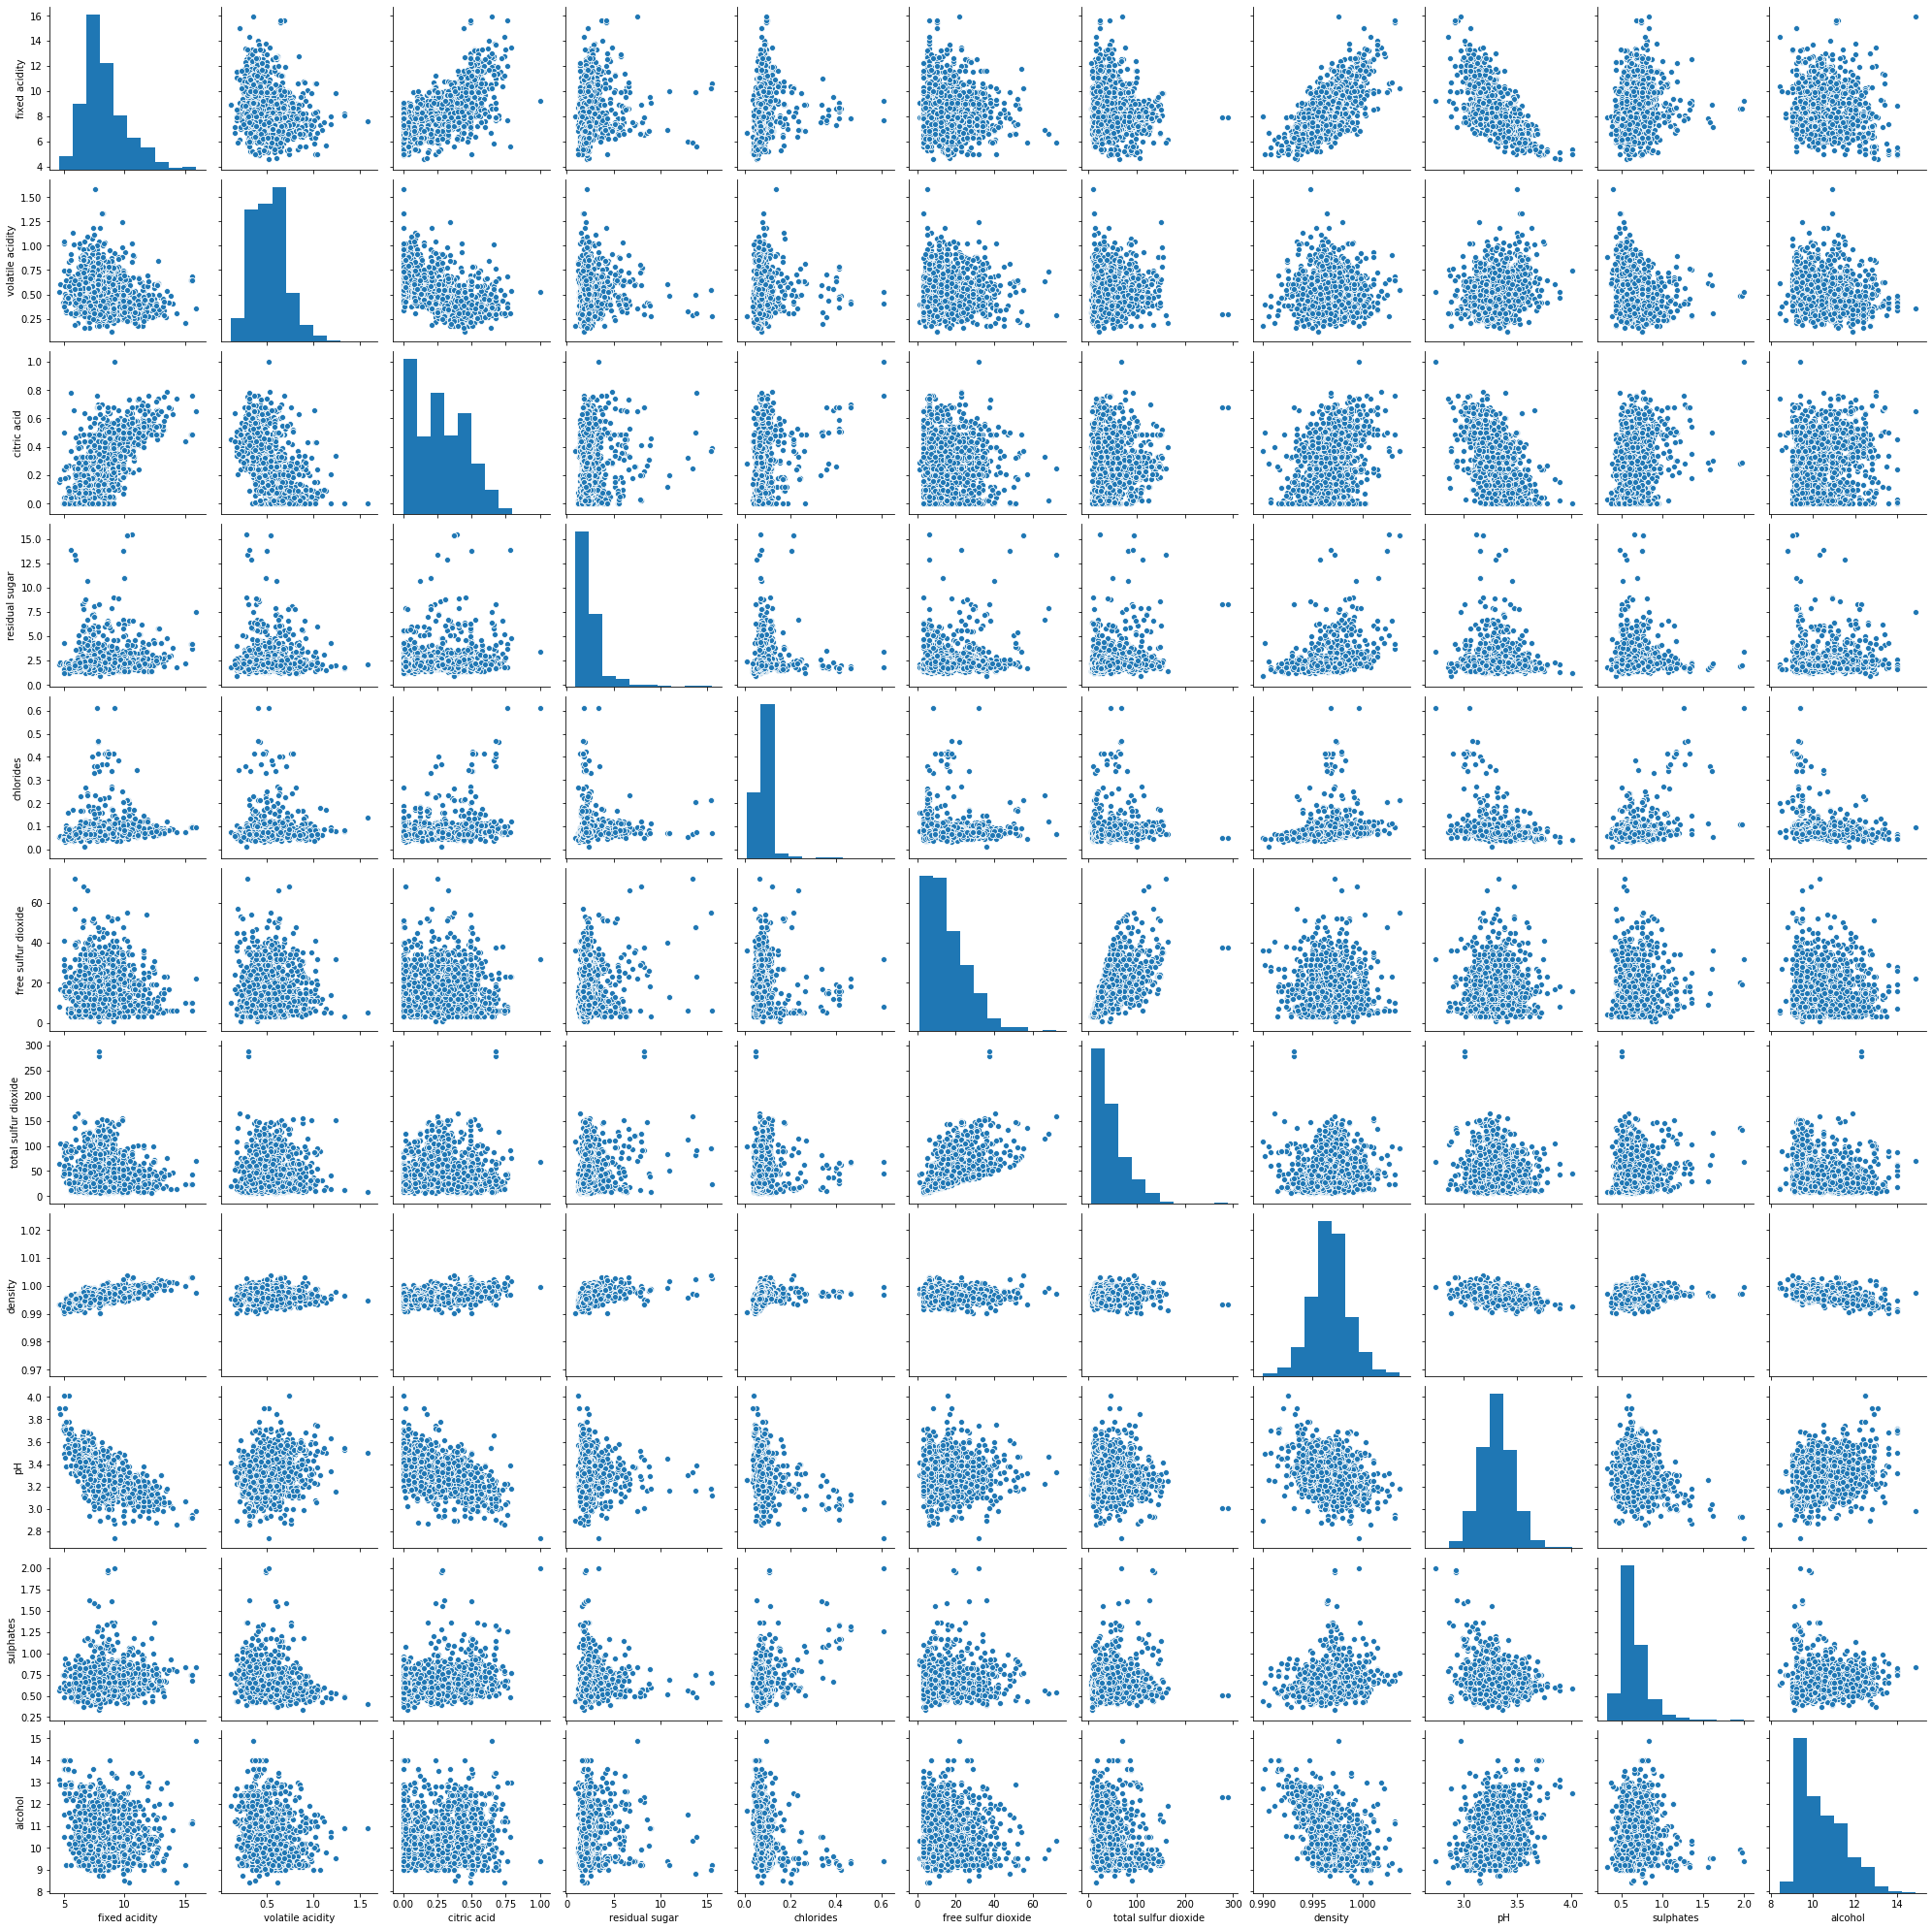

In [5]:
sns.pairplot(red.drop(['quality'], axis=1))

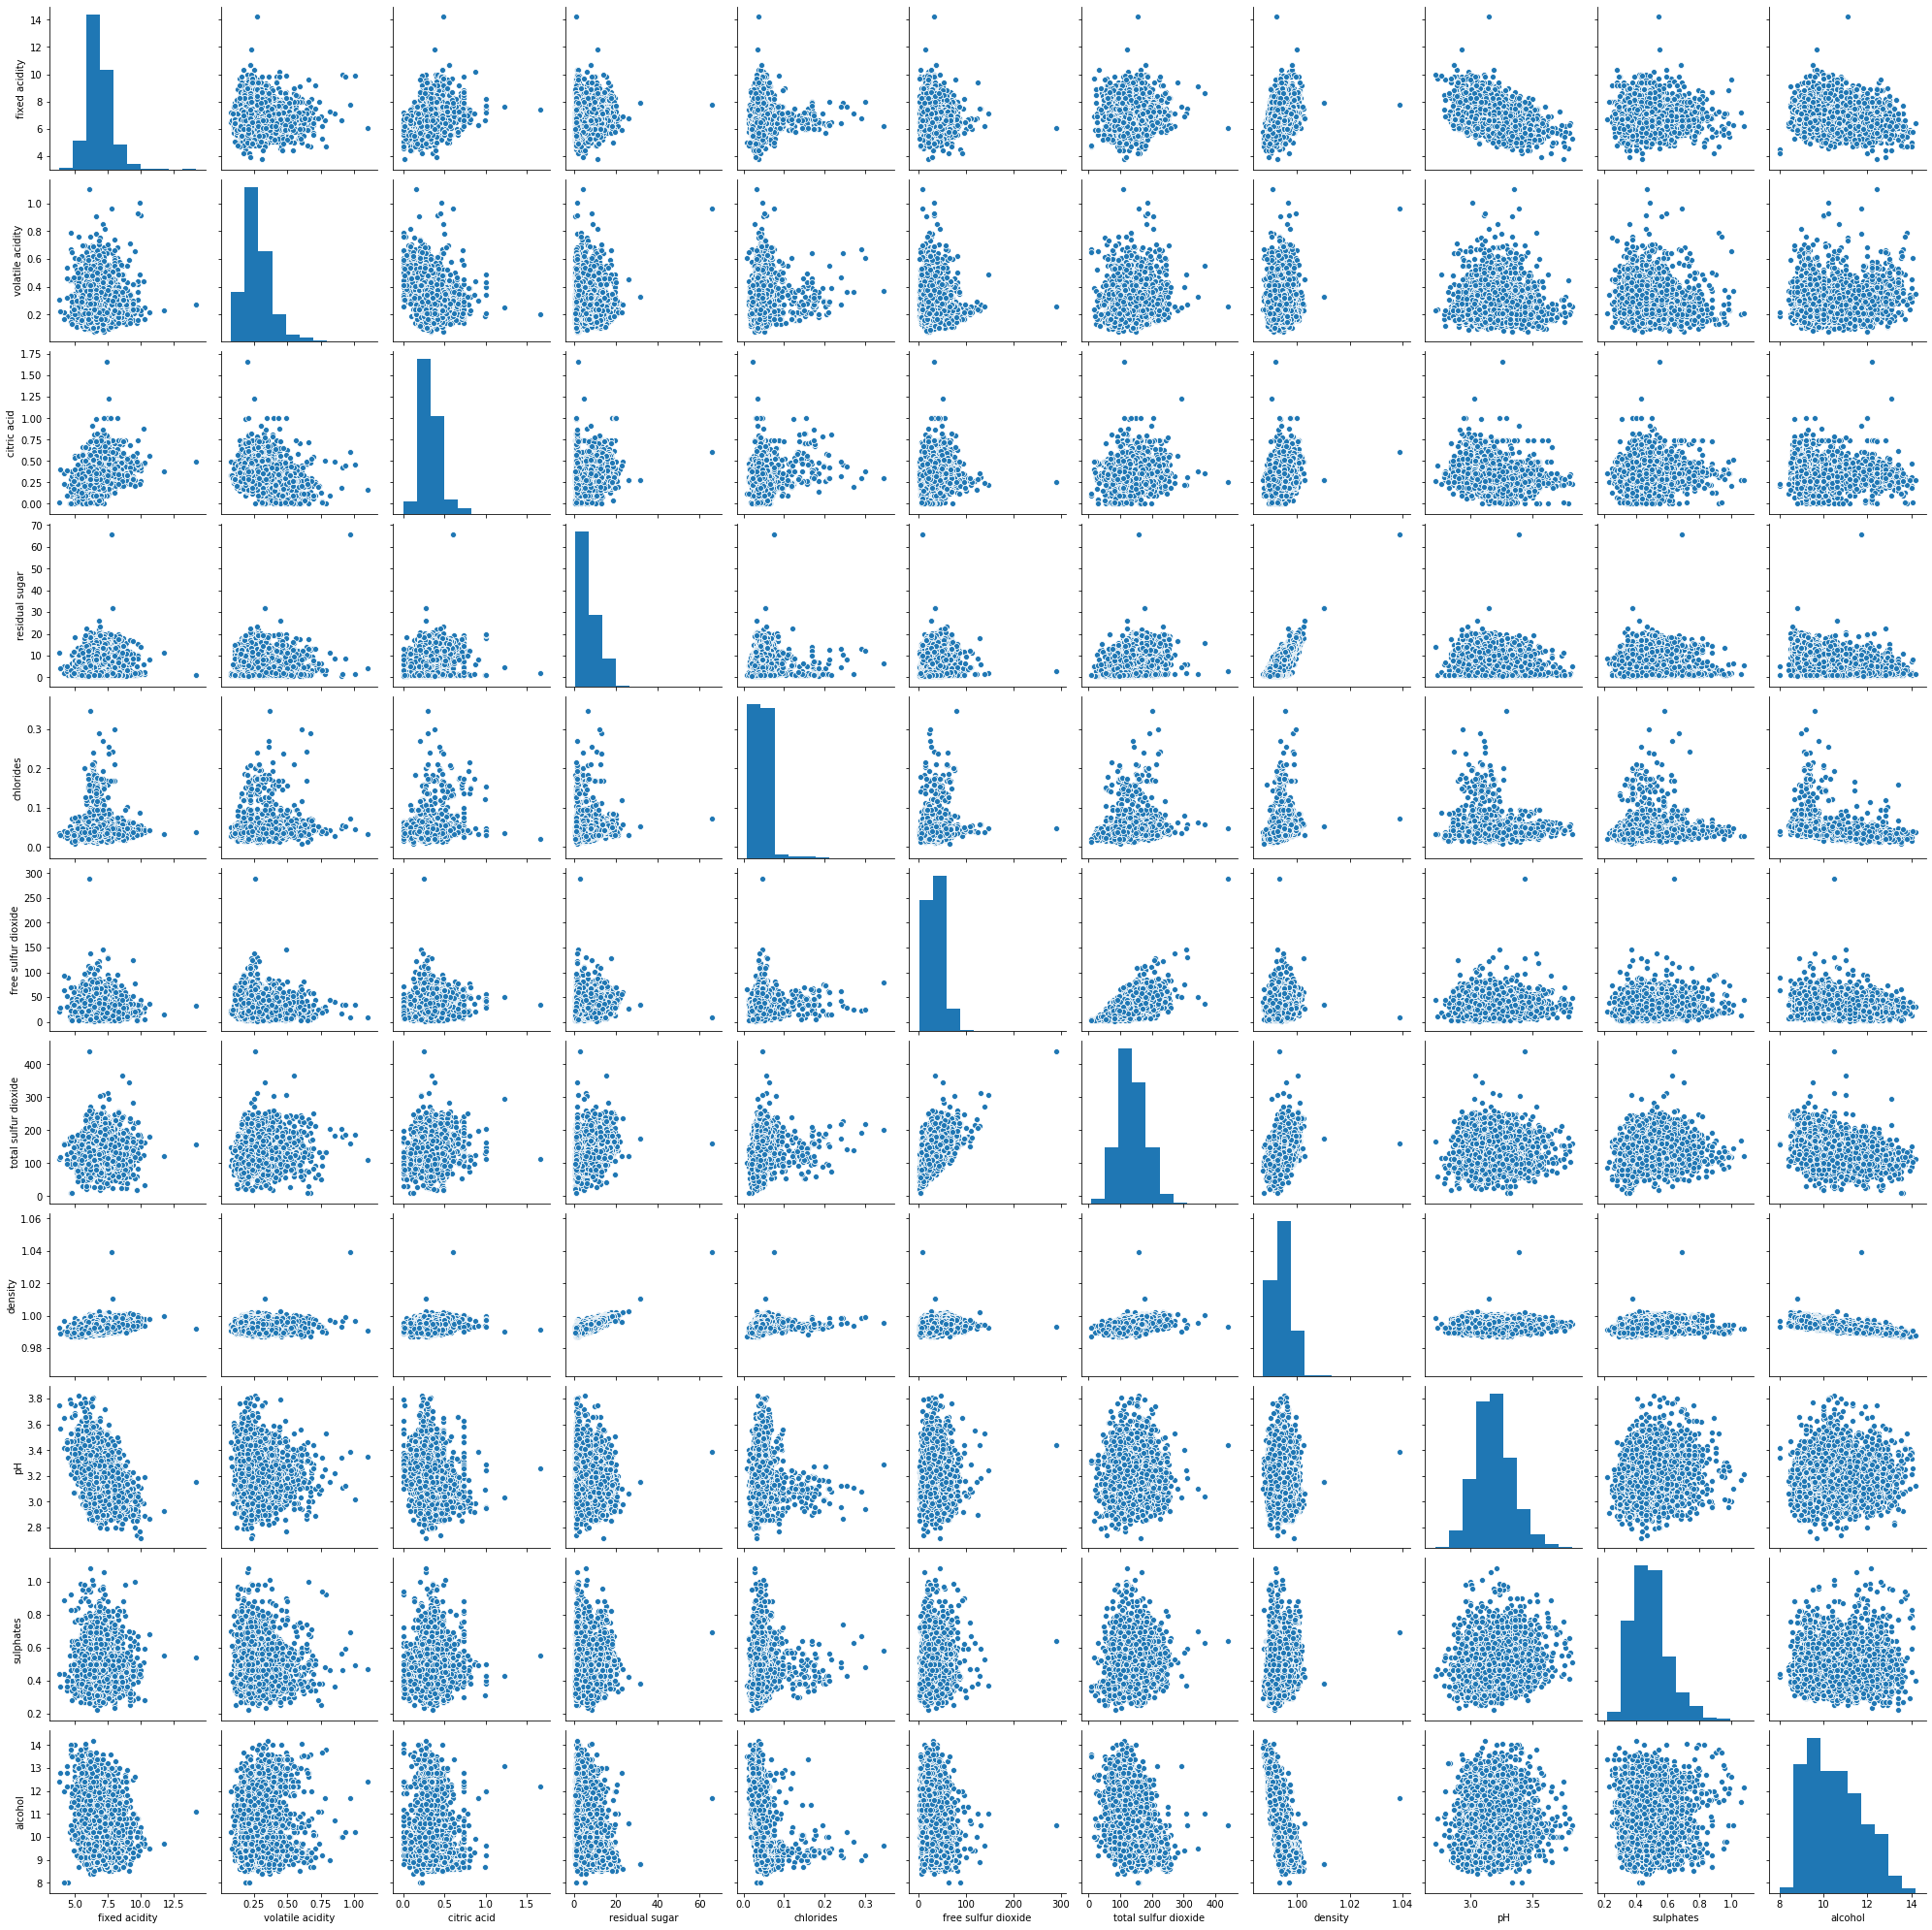

In [6]:
sns.pairplot(white.drop(['quality'], axis=1))

#### 3. Preparar Dados
* a) Limpeza de dados
* b) Seleção de características
* c) Transformação dos dados

In [86]:
# Será realizado ajuste de escala no Pipeline
std = StandardScaler()

In [87]:
X = red.drop('quality', axis=1)
y = red['quality']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [89]:
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [90]:
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)

#### 4. Avaliar algoritmos
* a) Dividir conjunto de dados em partes de treino e teste
* b) Testar opções e métricas de avaliação de desempenho
* c) Implementar e treinar algoritmos
* d) Comparar algoritmos

In [93]:
knn = KNeighborsClassifier(n_neighbors=6)

In [94]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [95]:
y_pred = knn.predict(X_test_scaled)

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.05      0.08        21
           5       0.58      0.73      0.64       190
           6       0.52      0.49      0.50       197
           7       0.34      0.30      0.32        60
           8       0.00      0.00      0.00         8

    accuracy                           0.53       480
   macro avg       0.29      0.26      0.26       480
weighted avg       0.50      0.53      0.50       480



D:\Programs\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1, 'Confusion Matrix')

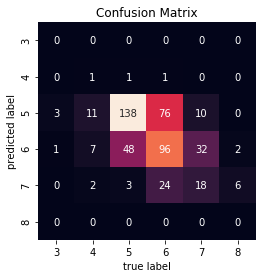

In [97]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[3, 4, 5, 6, 7, 8],
            yticklabels=[3, 4, 5, 6, 7, 8])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix')

<a id="5."></a><br>
#### 5. Melhorar Desempenho
* a) Verificar desempenho do(s) algoritmo(s) com os dados normalizados ou padronizados.
* b) Verificar desempenho do(s) algoritmo(s) em diferentes ajustes de parâmetros da técnica.
* c) Avaliar relevância de atributos x ruídos.

In [98]:
# Verificar a capacidade de identificar entre alta e baixa qualidade
# Se apresentar bom desempenho, tentar criar mais camadas de decisão

#### 6. Finalizar Modelo
* a) Selecionar parâmetros ajustados do modelo
* b) Criar modelo standalone com o conjunto completo de treino
* c) Armazenar modelo para uso futuro